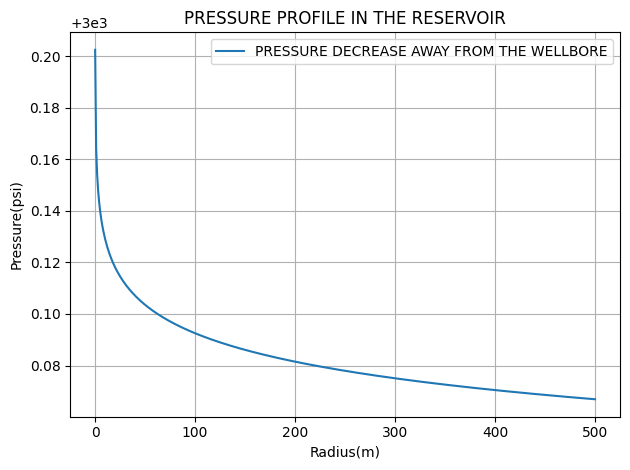

'\n#ANIMATION\n\nfrom matplotlib.animation import FuncAnimation, PillowWriter\n# Time values for animation\nt_values = np.logspace(-2, 2, 100)  # from 0.01 to 100 hours\n\n# Set up the figure and axis\nfig, ax = plt.subplots()\nline, = ax.plot([], [], lw=2)\nax.set_xlim(r.min(), r.max())\nax.set_ylim(2600, p_i + 10)\nax.set_xlabel(\'Radius (ft)\')\nax.set_ylabel(\'Pressure (psi)\')\nax.set_title(\'Pressure Diffusion Away from Wellbore\')\nax.grid()\n\n# Update function for each frame\ndef update(frame):\n    t = t_values[frame]\n    z = (r**2 * S * phi * ct) / (4 * k * t)\n    pressure = p_i - (q * mu / (4 * np.pi * k * h)) * (-exp1(z))\n    line.set_data(r, pressure)\n    ax.set_title(f\'Pressure Diffusion - Time: {t:.2f} hrs\')\n    return line,\n\n# Create animation\nani = FuncAnimation(fig, update, frames=len(t_values), blit=True)\n\n# Save as GIF\nani.save("pressure_diffusion.gif", writer=PillowWriter(fps=10))\n'

In [ ]:
#GOAL: SIMULATING THE PRESSURE DISTRIBUTION IN A RESERVOIR AWAY FROM THE WELLBORE
# PRESSURE DIFFUSION AWAY FROM THE WELLBORE DUE TO PRODUCTION

import numpy as np
import scipy
from scipy.special import exp1

#setting the radius in the reservoir
r = np.linspace(0.1,500,500)

#reservoir parameters
p_i = 3000  # psi
q = 500  # STB/day
mu = 1  # cp
k = 100  # md
h = 50  # ft
phi = 0.2
ct = 1e-5  # psi^-1
t = 10  # hours
S = 1  # skin factor

#calculating the pressure at distance(r) away from the well
z = (r**2*S*phi*ct)/(4*k*t)
result_z = -(scipy.special.exp1(z)) # used exp1 to obtain the Ei value of z
pressure = lambda x: p_i - (q*mu/(4*np.pi*k*h)) * result_z
pressure_at_radius = pressure(r)

#VISUALIZATION

import matplotlib.pyplot as plt
plt.plot(r,pressure_at_radius,label="PRESSURE DECREASE AWAY FROM THE WELLBORE")
plt.title("PRESSURE PROFILE IN THE RESERVOIR")
plt.xlabel("Radius(m)")
plt.ylabel("Pressure(psi)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()





